In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt

In [3]:
# evaluate function
def evaluate(ytest, ypred, name):
    ypred_label = np.where(ypred > 0.5, 1, 0)
    ypred_proba = ypred
    accu = accuracy_score(ytest, ypred_label)
    f1 = f1_score(ytest, ypred_label)
    AUC = roc_auc_score(ytest, ypred_proba)
    precision = precision_score(ytest, ypred_label)
    recall = recall_score(ytest, ypred_label)
    fpr, tpr, _ = roc_curve(ytest, ypred_proba)
    
    lw = 2
    plt.figure(figsize = (6,6))
    plt.plot(fpr, tpr, lw = lw, label="ROC curve of model {}, AUC = ({:0.2f})".format(name, AUC))
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    
    df = pd.DataFrame()
    df = df.assign(
        model = [name],
        accuracy = [accu],
        f1_score = [f1],
        precision = [precision],
        recall = [recall],
        AUC = [AUC]
    )
    print(df)
    return df

### VADER Baseline

In [4]:
vader = pd.read_csv("data/res/vader.csv")
vader.head()

,label,vader
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [19]:
res_vader = pd.DataFrame().assign(
    model = ['VADER(Baseline)'],
    accuracy = [accuracy_score(vader.label, vader['vader'])],
    f1_score = [f1_score(vader.label, vader['vader'])],
    precision = [precision_score(vader.label, vader['vader'])],
    recall = [recall_score(vader.label, vader['vader'])],
    AUC = [None]
)
res_vader

,model,accuracy,f1_score,precision,recall,AUC
0,VADER(Baseline),0.69292,0.739028,0.642549,0.8696,None


### Term-frequency

In [48]:
binary = pd.read_csv("Bi_TF_TFIDF/bi_df.csv").iloc[:, 1:]
tf = pd.read_csv("Bi_TF_TFIDF/df_tf_result.csv").iloc[:, 1:]
tfidf = pd.read_csv("Bi_TF_TFIDF/df_tfidf_result.csv")

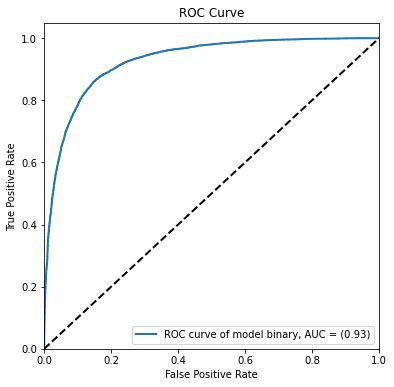

    model  accuracy  f1_score  precision   recall       AUC
0  binary   0.85512  0.854934   0.856031  0.85384  0.926643


In [21]:
res_bin = evaluate(binary.label, binary['predict'], 'binary')

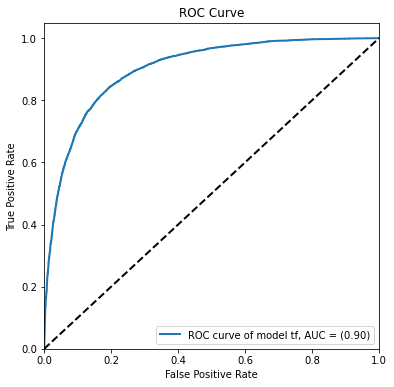

  model  accuracy  f1_score  precision   recall       AUC
0    tf   0.82284   0.82225   0.824998  0.81952  0.900281


In [54]:
res_tf = evaluate(tf.label, tf['predict'], 'tf')

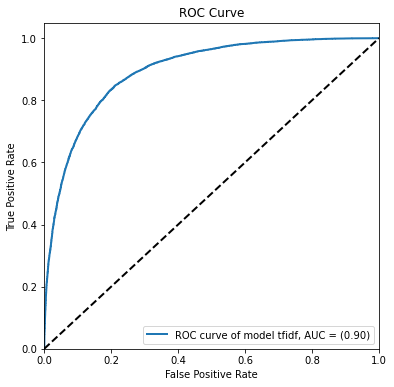

   model  accuracy  f1_score  precision   recall       AUC
0  tfidf   0.80432  0.821029   0.756438  0.89768  0.895452


In [53]:
res_tfidf = evaluate(tfidf.label, tfidf['predict'], 'tfidf')

### Embedding

In [34]:
w2v_logit = pd.read_csv("data/res/w2v_logit_res.csv")
w2v_NN = pd.read_csv("data/res/w2v_NN_res.csv")

In [35]:
w2v_logit.head()

,label,pred_prob
0,1,0.534846
1,0,0.011367
2,0,0.010080
3,0,0.136473
4,0,0.447320


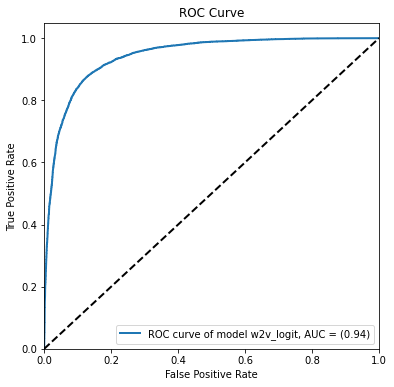

       model  accuracy  f1_score  precision  recall       AUC
0  w2v_logit   0.87352  0.872201   0.881392  0.8632  0.942489


In [37]:
res_w2v_logit = evaluate(w2v_logit.label, w2v_logit.pred_prob, 'w2v_logit')

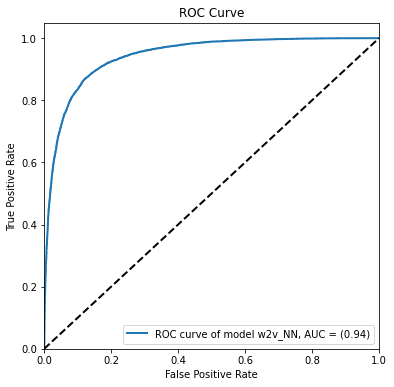

    model  accuracy  f1_score  precision   recall       AUC
0  w2v_NN   0.87324  0.872171   0.879587  0.86488  0.942518


In [39]:
res_w2v_NN = evaluate(w2v_NN.label, w2v_NN.pred_prob, 'w2v_NN')

### POS

In [23]:
POS_logit = pd.read_csv("data/res/res_POS_logit.csv")
POS_logit_select = pd.read_csv("data/res/res_POS_logit_select.csv")
POS_NN = pd.read_csv("data/res/res_POS_NN.csv")
POS_NN_select = pd.read_csv("data/res/res_POS_NN_select.csv")

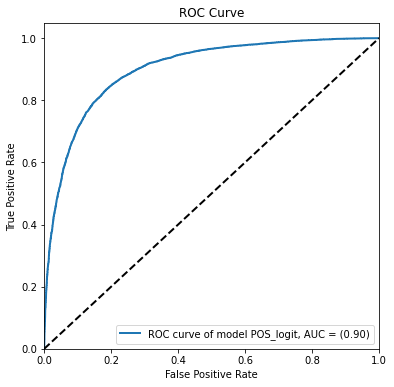

       model  accuracy  f1_score  precision  recall       AUC
0  POS_logit   0.82236  0.820355   0.829719  0.8112  0.899927


In [24]:
res_logit = evaluate(POS_logit.ytest, POS_logit['pred_1'], 'POS_logit')

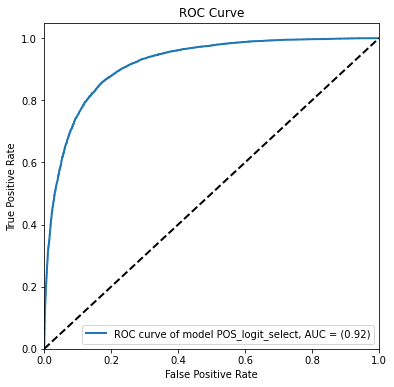

              model  accuracy  f1_score  precision  recall       AUC
0  POS_logit_select   0.84044  0.839664   0.843768  0.8356  0.917172


In [25]:
res_logit_select = evaluate(POS_logit_select.ytest, POS_logit_select['pred_1'], 'POS_logit_select')

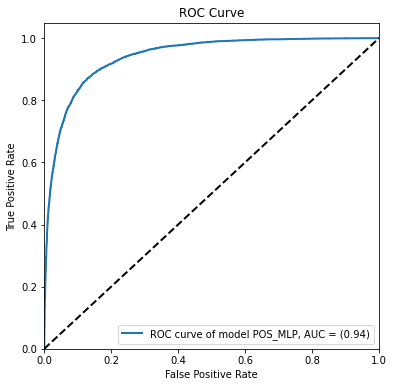

     model  accuracy  f1_score  precision   recall       AUC
0  POS_MLP   0.86984  0.870451   0.866381  0.87456  0.941107


In [26]:
res_NN = evaluate(POS_NN.ytest, POS_NN['pred_1'], 'POS_MLP')

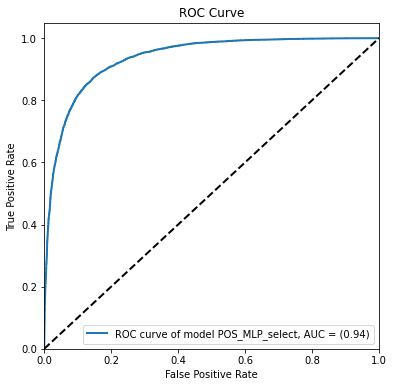

            model  accuracy  f1_score  precision   recall       AUC
0  POS_MLP_select   0.86272  0.863885   0.856615  0.87128  0.935962


In [27]:
res_NN_select = evaluate(POS_NN_select.ytest, POS_NN_select['pred_1'], 'POS_MLP_select')

### Overall Performance

In [56]:
evaluation = pd.concat([
    res_vader,
    res_bin,
    res_tf,
    res_tfidf,
    res_w2v_logit,
    res_w2v_NN,
    res_logit,
    res_logit_select,
    res_NN,
    res_NN_select
])
evaluation.round(3)

,model,accuracy,f1_score,precision,recall,AUC
0,VADER(Baseline),0.693,0.739,0.643,0.870,None
0,binary,0.855,0.855,0.856,0.854,0.926643
0,tf,0.823,0.822,0.825,0.820,0.900281
0,tfidf,0.804,0.821,0.756,0.898,0.895452
0,w2v_logit,0.874,0.872,0.881,0.863,0.942489
0,w2v_NN,0.873,0.872,0.880,0.865,0.942518
0,POS_logit,0.822,0.820,0.830,0.811,0.899927
0,POS_logit_select,0.840,0.840,0.844,0.836,0.917172
0,POS_MLP,0.870,0.870,0.866,0.875,0.941107
0,POS_MLP_select,0.863,0.864,0.857,0.871,0.935962
